In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

In [2]:
def h(p):
    return sum([- p_i * np.log(p_i) if p_i > 0 else 0.0 for p_i in p ])

### Code 10.7

In [3]:
p = 0.7
A = np.array([(1 - p)**2, p * (1 - p), (1 - p) * p , p**2])

### Code 10.8

In [4]:
h(A)

1.221728604109787

## Simulating Random Probability Distributions

In the book, the code in 10.9 generates a random probability distribution such that the expected number $G$ of blue balls in two consecutive draws is a constant. This can be easily derived as follows. We need four non-negative numbers $x_1, x_2, x_3, x_4$ satisfying the condition:
$$
    \frac{x_2}{\sum_i x_i} + \frac{x_3}{\sum_i x_i} 
        + 2 \frac{x_4}{\sum_i x_i} = G 
$$
This yields:
$$
    x_4 = \frac{1}{2 - G} 
            \left ( 
                    G \cdot (x_1 + x_2 + x_3) - x_2 - x_3 
            \right )
$$
Since we want $x_4$ to be non-negative, and since $G \leq 2$, we also require that 
$$
   G \cdot (x_1 + x_2 + x_3) - x_2 - x_3 \geq 0,
$$
which, in turn, gives us that
$$
    x_1 \geq \frac{1 - G}{G} (x_2 + x_3).
$$
Note that the RHS above can be _negative_ and in this case any positive value of $x_1$ will suffice.

This suggests the following strategy at creating such a distribution. First select two random positive integers $x_2$ and $x_3$. Then select a _positive_ integer larger than $\frac{1 - G}{G} (x_2 + x_3)$. Finally choose $x_4$ using the equation in terms of $x_1, x_2, x_3$ and $G$.

In [5]:
import random

def simulate(G):
    x2 = random.randint(1, 1000)
    x3 = random.randint(1, 1000)
    
    lb = int(( (1 - G) * (x2 + x3) ) / G) + 1
    x1 = random.randint(max(1, lb), 1000)
    
    x4 = (G * (x1 + x2 + x3) - x2 - x3) / (2 - G)
    
    ret = np.array([x1, x2, x3, x4])
    return ret / np.sum(ret)

In [6]:
N_SAMPLES = 1000000

entropies = np.zeros(N_SAMPLES)

for i in range(N_SAMPLES):
    entropies[i] = h(simulate(G=1.4))

Text(0.5, 0, 'Entropy')

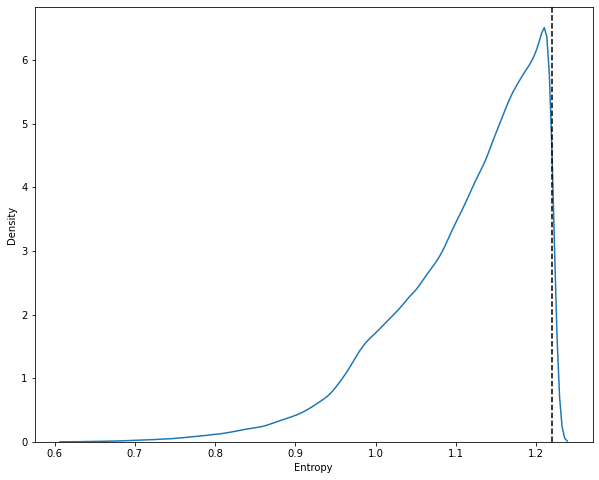

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

sns.kdeplot(entropies, ax=ax)
ax.axvline(x=1.22, linestyle='--', color='k')
ax.set_xlabel('Entropy')